## Inspect the CTA simulations and the spectra

First we import the required libraries.

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.colors import SymLogNorm, LogNorm
from astropy import units as u

Let's define which skymap to plot. For this example we will plot the same background and source we simulated in the previous exercise.

In [2]:
# observation and target
bkg_skymap = '../data/bkg_test_sky.fits'
crab_skymap = '../data/crab_test_sky_2.fits'

Let's define a function to wrap all the operations required for the plot. This way we can reuse it multiple times with a single line of code.

In [3]:
def plot_fits_skymap(file, name='skymap.png', title=None, xlabel='right ascension (deg)', 
                     ylabel='declination (deg)', figsize=(10, 10), fontsize=20, cmap='gist_heat'):
    # get map
    with fits.open(file) as hdul:
        wcs = WCS(hdul[0].header)
        data = hdul[0].data
        #print(data[230:250,230:250])
        print(wcs)
        
        #Number of WCS axes: 2
        #CTYPE : 'RA---CAR'  'DEC--CAR'  
        #CRVAL : 83.6331  22.5145  
        #CRPIX : 250.5  250.5  
        #NAXIS : 500  500

    # plot
    fig = plt.figure(figsize=figsize) 
    ax = plt.subplot(projection=wcs)
    img = plt.imshow(data, norm=SymLogNorm(1), interpolation='gaussian', cmap=cmap)
    ax.coords[0].set_format_unit(u.deg)
    ax.coords[1].set_format_unit(u.deg)
    cb = plt.colorbar(img, ax=ax)
    # axis
    ax.tick_params(axis='both', labelsize=fontsize)
    cb.ax.tick_params(labelsize=fontsize) 
    cb.set_label('counts', fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.grid(color='grey', ls='solid')
    fig.tight_layout()
    fig.savefig(name)
    return 

We can start by plotting the background simulation.

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---CAR'  'DEC--CAR'  
CRVAL : 83.6331  22.5145  
CRPIX : 250.5  250.5  
NAXIS : 500  500


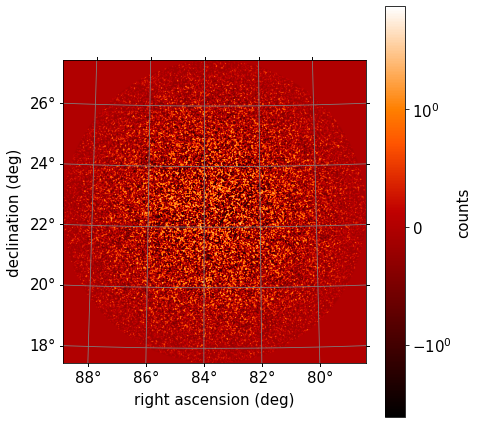

In [4]:
plot_fits_skymap(file=bkg_skymap, name=bkg_skymap.replace('.fits', '.png'), figsize=(6, 6), fontsize=15)

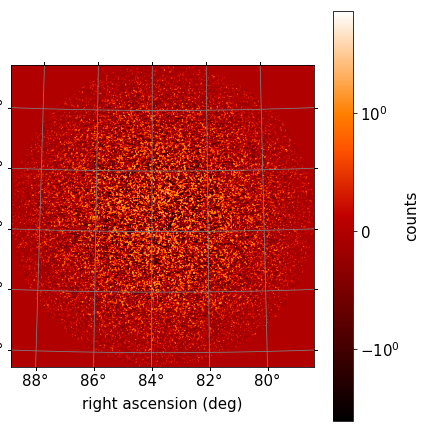

In [5]:
from IPython import display
display.Image("../data/bkg_test_sky.png")

Now we do the same for the source simulation.

Set MJD-END to 51544.000000 from DATE-END'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---CAR'  'DEC--CAR'  
CRVAL : 83.6331  22.5145  
CRPIX : 250.5  250.5  
NAXIS : 500  500


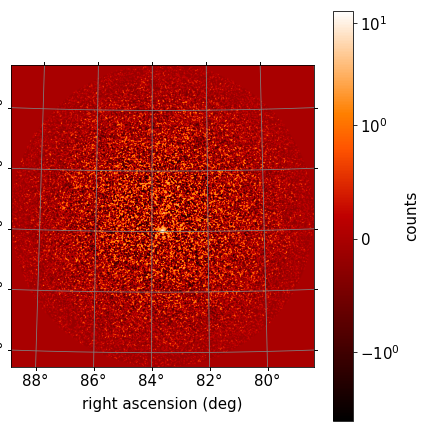

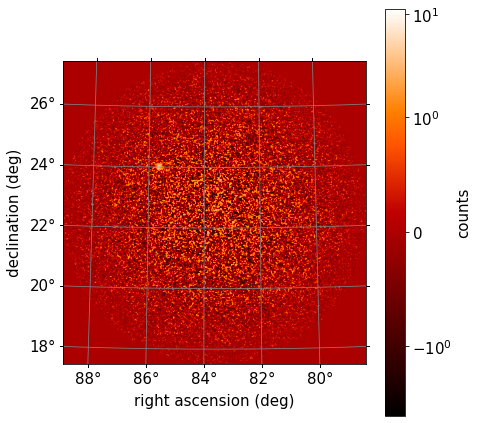

In [6]:
plot_fits_skymap(file=crab_skymap, name=crab_skymap.replace('.fits', '.png'), figsize=(6, 6), fontsize=15)
display.Image("../data/crab_test_sky.png")